In [25]:
import pandas as pd
import  numpy as np
from matplotlib import pyplot as plt
sales_data = pd.read_excel('sampledatafoodsales.xlsx',sheet_name='FoodSales')
sales_data

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,TotalPrice
0,2020-01-01,East,Boston,Bars,Carrot,33,1.77,58.41
1,2020-01-04,East,Boston,Crackers,Whole Wheat,87,3.49,303.63
2,2020-01-07,West,Los Angeles,Cookies,Chocolate Chip,58,1.87,108.46
3,2020-01-10,East,New York,Cookies,Chocolate Chip,82,1.87,153.34
4,2020-01-13,East,Boston,Cookies,Arrowroot,38,2.18,82.84
...,...,...,...,...,...,...,...,...
239,2021-12-18,East,Boston,Cookies,Arrowroot,34,2.18,74.12
240,2021-12-21,East,Boston,Cookies,Chocolate Chip,245,1.87,458.15
241,2021-12-24,East,Boston,Crackers,Whole Wheat,30,3.49,104.70
242,2021-12-27,West,Los Angeles,Bars,Bran,30,1.87,56.10


In [26]:
#to vies non numerical columns
sales_data.select_dtypes('object').head()

,Region,City,Category,Product
0,East,Boston,Bars,Carrot
1,East,Boston,Crackers,Whole Wheat
2,West,Los Angeles,Cookies,Chocolate Chip
3,East,New York,Cookies,Chocolate Chip
4,East,Boston,Cookies,Arrowroot


In [27]:
sales_data.head()

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,TotalPrice
0,2020-01-01,East,Boston,Bars,Carrot,33,1.77,58.41
1,2020-01-04,East,Boston,Crackers,Whole Wheat,87,3.49,303.63
2,2020-01-07,West,Los Angeles,Cookies,Chocolate Chip,58,1.87,108.46
3,2020-01-10,East,New York,Cookies,Chocolate Chip,82,1.87,153.34
4,2020-01-13,East,Boston,Cookies,Arrowroot,38,2.18,82.84


In [28]:
sales_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype         
---  ------      --------------  -----         
 0   OrderDate   244 non-null    datetime64[ns]
 1   Region      244 non-null    object        
 2   City        244 non-null    object        
 3   Category    244 non-null    object        
 4   Product     244 non-null    object        
 5   Quantity    244 non-null    int64         
 6   UnitPrice   244 non-null    float64       
 7   TotalPrice  244 non-null    float64       
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 15.4+ KB


In [29]:
sales_data.describe()

,Quantity,UnitPrice,TotalPrice
count,244.000000,244.000000,244.000000
mean,63.286885,2.200820,136.580246
std,47.112505,0.600169,108.354231
min,20.000000,1.350000,33.600000
25%,31.000000,1.770000,72.570000
50%,47.000000,1.870000,102.755000
75%,80.000000,2.840000,159.300000
max,306.000000,3.490000,817.920000


In [30]:
sales_data.shape

(244, 8)

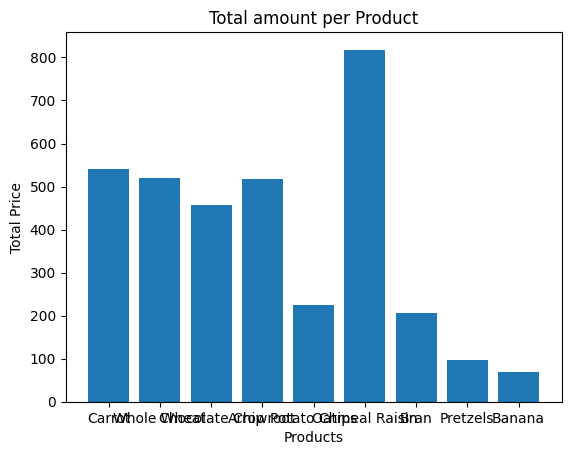

In [31]:
plt.bar(sales_data.Product,sales_data.TotalPrice)
plt.xlabel('Products')
plt.ylabel('Total Price')
plt.title('Total amount per Product')

plt.show()

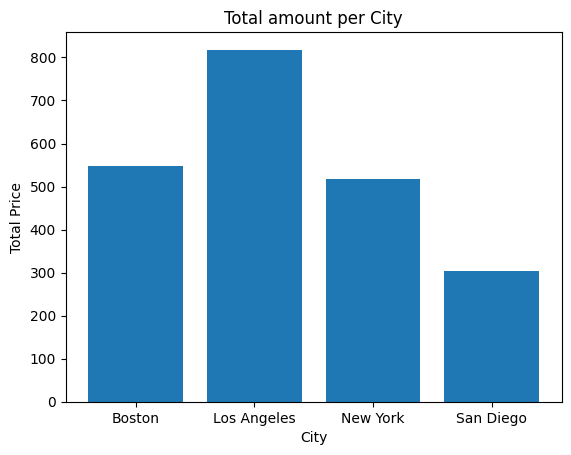

In [32]:

plt.bar(sales_data.City,sales_data.TotalPrice)
plt.xlabel('City')
plt.ylabel('Total Price')
plt.title('Total amount per City')

plt.show()

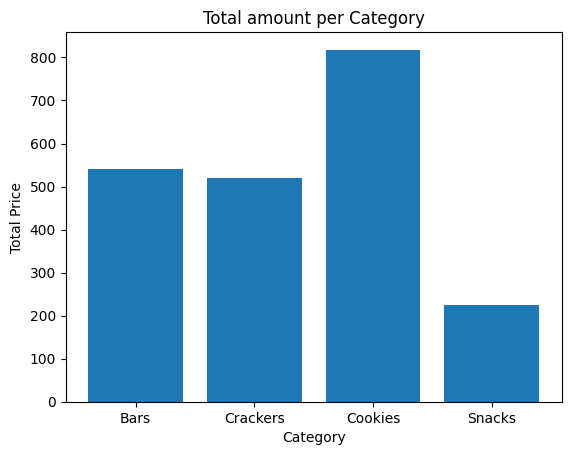

In [33]:

plt.bar(sales_data.Category,sales_data.TotalPrice)
plt.xlabel('Category')
plt.ylabel('Total Price')
plt.title('Total amount per Category')

plt.show()


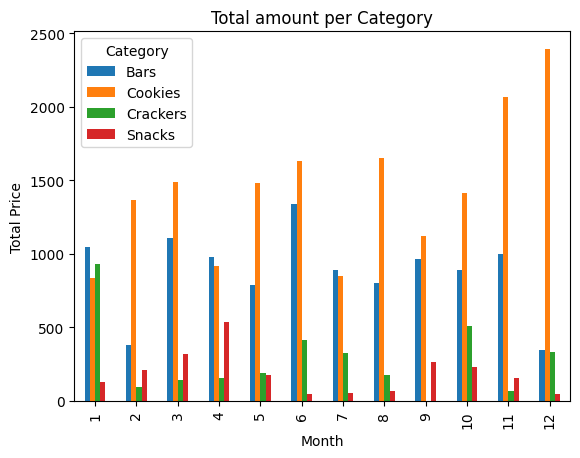

In [34]:
import matplotlib.pyplot as plt

sales_data['order_year'] = sales_data['OrderDate'].dt.strftime('%Y')
#sales_data['order_month'] = sales_data['OrderDate'].dt.strftime('%m')
sales_data['order_month'] = sales_data['OrderDate'].dt.month
sales_data['order_monthname'] = sales_data['OrderDate'].dt.month_name()
#print(sales_data['order_monthname'])

sales_data_grouped_month_cat = sales_data.groupby(['order_month', 'Category'])['TotalPrice'].sum()

sales_data_grouped_month_cat.unstack().plot(kind='bar')

plt.xlabel('Month')
plt.ylabel('Total Price')
plt.title('Total amount per Category')

plt.show()

In [35]:
#using PivortTables to group data
sales_data['order_year'] = sales_data['OrderDate'].dt.strftime('%Y')
sales_data['order_month'] = sales_data['OrderDate'].dt.month
sales_by_city_category_vs_year = sales_data.pivot_table("TotalPrice", index = ["City", "Category"], columns = "order_year")
sales_by_city_category_vs_month = sales_data.pivot_table("TotalPrice", index = ["City", "Category"], columns = "order_month")
print(sales_by_city_category_vs_month)


order_month                 1        2           3        4           5   \
City        Category                                                       
Boston      Bars       88.9425  120.360  155.063333   67.725  133.890000   
            Cookies    86.1100  167.010  548.120000  264.720  225.390000   
            Crackers  411.8200   97.720  139.600000      NaN  115.170000   
            Snacks     91.3500   68.985   78.960000  225.120   94.500000   
Los Angeles Bars      117.1300   78.210  182.310000   99.120   44.250000   
            Cookies   167.8300  156.596  160.820000      NaN  118.910000   
            Crackers       NaN      NaN         NaN   73.290   73.290000   
            Snacks         NaN      NaN   55.440000  114.240         NaN   
New York    Bars      178.7700   50.445  100.336667  113.280  114.846667   
            Cookies   153.3400      NaN  206.343333      NaN   93.720000   
            Crackers  108.1900      NaN         NaN   80.270         NaN   
            

In [36]:
sales_data.sort_values([ 'Product','TotalPrice'],ascending=[True,False])
#to sort by unitprice in descending order

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,TotalPrice,order_year,order_month,order_monthname
119,2020-12-24,East,New York,Cookies,Arrowroot,237,2.18,516.66,2020,12,December
95,2020-10-13,East,New York,Cookies,Arrowroot,224,2.18,488.32,2020,10,October
215,2021-10-07,East,New York,Cookies,Arrowroot,175,2.18,381.50,2021,10,October
228,2021-11-15,East,New York,Cookies,Arrowroot,146,2.18,318.28,2021,11,November
112,2020-12-03,West,San Diego,Cookies,Arrowroot,139,2.18,303.02,2020,12,December
...,...,...,...,...,...,...,...,...,...,...,...
44,2020-05-13,West,Los Angeles,Crackers,Whole Wheat,21,3.49,73.29,2020,5,May
78,2020-08-23,East,Boston,Crackers,Whole Wheat,21,3.49,73.29,2020,8,August
156,2021-04-13,West,Los Angeles,Crackers,Whole Wheat,21,3.49,73.29,2021,4,April
54,2020-06-12,West,San Diego,Crackers,Whole Wheat,20,3.49,69.80,2020,6,June


In [37]:
xxx =sales_data[['Product','TotalPrice']]
xxx.sort_values([ 'Product','TotalPrice'],ascending=[True,False])



,Product,TotalPrice
119,Arrowroot,516.66
95,Arrowroot,488.32
215,Arrowroot,381.50
228,Arrowroot,318.28
112,Arrowroot,303.02
...,...,...
44,Whole Wheat,73.29
78,Whole Wheat,73.29
156,Whole Wheat,73.29
54,Whole Wheat,69.80


In [38]:
cate_in_Cookies_and_Crakers =sales_data['Category'].isin(['Cookies','Crackers'])
twocats =sales_data[cate_in_Cookies_and_Crakers]
twocats.sort_values([ 'Product','TotalPrice'],ascending=[True,False])
onlyProdandPrice =twocats[['Product','TotalPrice']]
onlyProdandPrice.sort_values([ 'Product','TotalPrice'],ascending=[True,False])


,Product,TotalPrice
119,Arrowroot,516.66
95,Arrowroot,488.32
215,Arrowroot,381.50
228,Arrowroot,318.28
112,Arrowroot,303.02
...,...,...
44,Whole Wheat,73.29
78,Whole Wheat,73.29
156,Whole Wheat,73.29
54,Whole Wheat,69.80


In [39]:
prod_contains_ =sales_data['Product'].str.contains('Arro')
prod_contains_Arro =sales_data[prod_contains_]
prod_contains_Arro

,OrderDate,Region,City,Category,Product,Quantity,UnitPrice,TotalPrice,order_year,order_month,order_monthname
4,2020-01-13,East,Boston,Cookies,Arrowroot,38,2.18,82.84,2020,1,January
10,2020-01-31,East,Boston,Cookies,Arrowroot,36,2.18,78.48,2020,1,January
16,2020-02-18,East,Boston,Cookies,Arrowroot,43,2.18,93.74,2020,2,February
48,2020-05-25,East,Boston,Cookies,Arrowroot,27,2.18,58.86,2020,5,May
76,2020-08-17,East,Boston,Cookies,Arrowroot,31,2.18,67.58,2020,8,August
83,2020-09-07,East,Boston,Cookies,Arrowroot,28,2.18,61.04,2020,9,September
87,2020-09-19,East,New York,Cookies,Arrowroot,110,2.18,239.80,2020,9,September
90,2020-09-28,East,Boston,Cookies,Arrowroot,81,2.18,176.58,2020,9,September
95,2020-10-13,East,New York,Cookies,Arrowroot,224,2.18,488.32,2020,10,October
99,2020-10-25,East,Boston,Cookies,Arrowroot,40,2.18,87.20,2020,10,October


In [40]:
#onlyProdandPrice =twocats[['Product','TotalPrice']]
#to add new colums
onlyProdandPrice['anual_price'] = onlyProdandPrice['TotalPrice']*12
onlyProdandPrice

C:\Program Files\KMSpico\temp\ipykernel_23828\1043905930.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  onlyProdandPrice['anual_price'] = onlyProdandPrice['TotalPrice']*12


,Product,TotalPrice,anual_price
1,Whole Wheat,303.63,3643.56
2,Chocolate Chip,108.46,1301.52
3,Chocolate Chip,153.34,1840.08
4,Arrowroot,82.84,994.08
6,Whole Wheat,520.01,6240.12
...,...,...,...
238,Chocolate Chip,179.52,2154.24
239,Arrowroot,74.12,889.44
240,Chocolate Chip,458.15,5497.80
241,Whole Wheat,104.70,1256.40


In [41]:
#from pivottablejs import pivot_ui
#pivot_ui(sales_data)



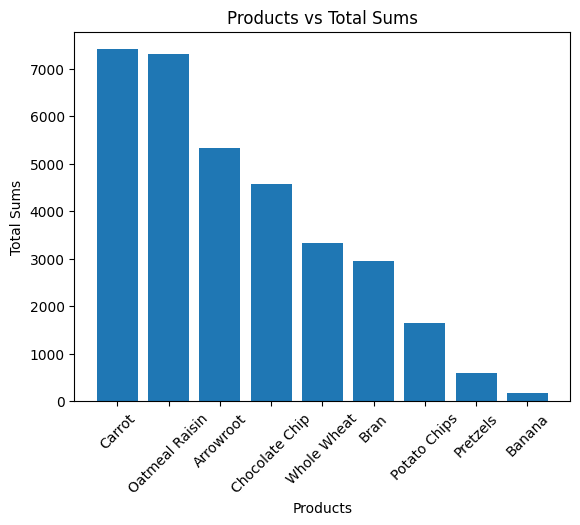

In [42]:
import matplotlib.pyplot as plt

grouped = sales_data.groupby('Product')['TotalPrice'].sum().sort_values(ascending=False)

plt.bar(grouped.index, grouped.values)
plt.xticks(rotation=45)
plt.xlabel('Products')
plt.ylabel('Total Sums')
plt.title('Products vs Total Sums')
plt.show()

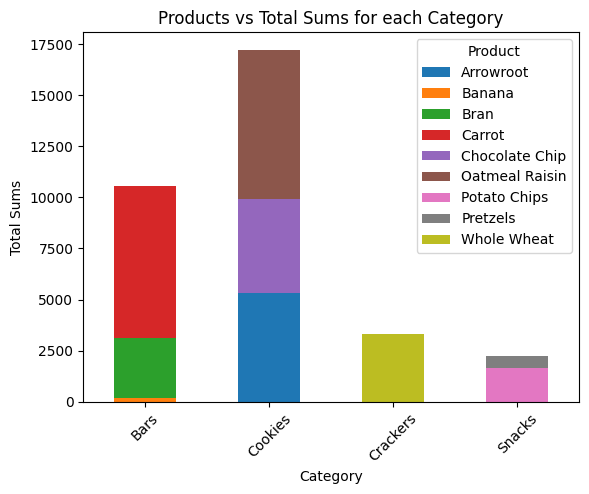

In [43]:
import matplotlib.pyplot as plt

# Group data by Category and Product and compute sum of TotalPrice
grouped = sales_data.groupby(['Category', 'Product'])['TotalPrice'].sum()

# Unstack the grouped series to create a DataFrame with Categories as rows and Products as columns
df = grouped.unstack(level=1)

# Plot stacked bar chart for each Category
df.plot(kind='bar', stacked=True, rot=45)

# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Total Sums')
plt.title('Products vs Total Sums for each Category')

# Show plot
plt.show()

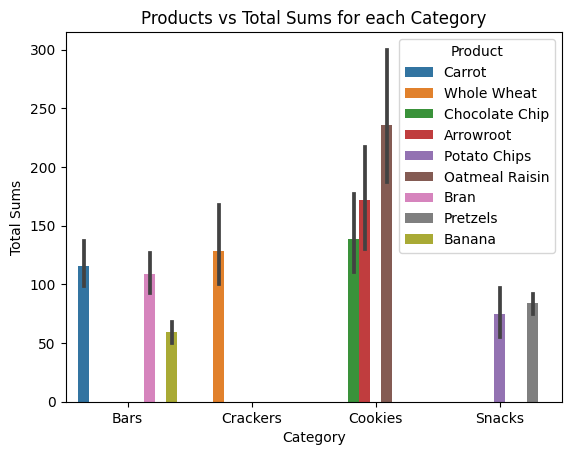

In [44]:
import matplotlib.pyplot as plt
import seaborn as sns
# Group data by Category and Product and compute sum of TotalPrice
grouped = sales_data.groupby(['Category', 'Product'])['TotalPrice'].sum()

# Unstack the grouped series to create a DataFrame with Categories as rows and Products as columns
df = grouped.unstack(level=1)

# Plot stacked bar chart for each Category
sns.barplot(data =sales_data,x='Category',y='TotalPrice', hue='Product')

# Set plot labels and title
plt.xlabel('Category')
plt.ylabel('Total Sums')
plt.title('Products vs Total Sums for each Category')

# Show plot
plt.show()

In [45]:
# Count the number of missing values in each column
print(sales_data.isna().sum())

# Find the five percent threshold
threshold = len(sales_data) * 0.05

# Create a filter
cols_to_drop = sales_data.columns[sales_data.isna().sum() <= threshold]

# Drop missing values for columns below the threshold
sales_data.dropna(subset=cols_to_drop, inplace=True)

print(sales_data.isna().sum())

OrderDate          0
Region             0
City               0
Category           0
Product            0
Quantity           0
UnitPrice          0
TotalPrice         0
order_year         0
order_month        0
order_monthname    0
dtype: int64
OrderDate          0
Region             0
City               0
Category           0
Product            0
Quantity           0
UnitPrice          0
TotalPrice         0
order_year         0
order_month        0
order_monthname    0
dtype: int64


In [46]:
# Calculate median plane ticket prices by Airline
#airline_prices = planes.groupby("Airline")["Price"].median()

#print(airline_prices)

# Convert to a dictionary
#prices_dict = airline_prices.to_dict()

# Map the dictionary to the missing values
#planes["Price"] = planes["Price"].fillna(planes["Airline"].map(prices_dict))

# Check for missing values
#print(planes.isna().sum())

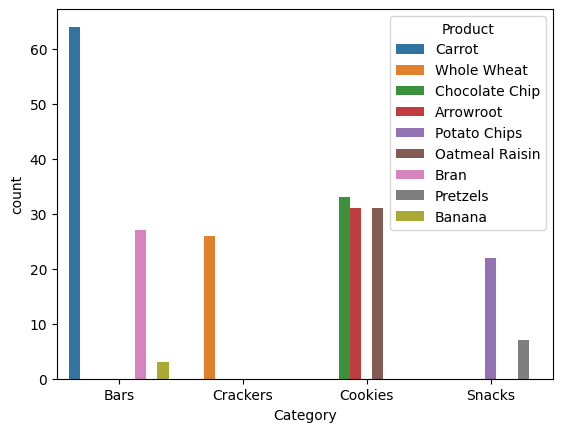

In [50]:
sns.countplot(data=sales_data, x="Category", hue="Product")
plt.show()